## Pandemic Preparedness Analysis - Vaccine Site Access Table

In [1]:
#Dependencies
import pandas as pd
import requests
import json
import os

In [2]:
# pulling in datasets

#cdc csv
cdc = "cdc_post_vax.csv"

#vax sites data
sites = "https://storage.googleapis.com/covid19-open-data/covid19-vaccination-access/facility-boundary-us-all.csv"

#population data
pop = "https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/counties/totals/co-est2021-alldata.csv"

In [5]:
cdc_df = pd.read_csv(cdc)
cdc_df.head()
# vaxsite_df = pd.read_csv(sites)
# pop_df = pd.read_csv(pop, encoding='latin-1')

,Date,State,Total Cases,Confirmed New C19 Case,Total Death,Confirmed New C19 Death
0,2021-07-11,NY,"1,159,695",254,"19,947",0
1,2021-11-14,TX,"4,266,698",553,"71,624",38
2,2021-11-06,TX,"4,243,143","2,469","70,705",132
3,2021-02-26,TX,"2,629,116","7,961","46,188",155
4,2021-11-13,TX,"4,266,084","3,849","71,586",84


In [ ]:
vaxsite_df.head(2)

In [ ]:
vaxsite_df=vaxsite_df.drop(columns = ['facility_place_id',
 'facility_provider_id',
 'facility_country_region',
 'facility_country_region_code',
 'facility_sub_region_1',
  'facility_sub_region_2_code',                                    
 'facility_region_place_id',
 'facility_catchment_boundary'])

In [ ]:
pop_df.head(2)

In [ ]:
pop_df=pop_df.drop(columns = ['SUMLEV',
 'REGION',
 'DIVISION',
 'STATE',
 'COUNTY',
 'ESTIMATESBASE2020',
 'POPESTIMATE2021',
 'NPOPCHG2020',
 'NPOPCHG2021',
 'BIRTHS2020',
 'BIRTHS2021',
 'DEATHS2020',
 'DEATHS2021',
 'NATURALCHG2020',
 'NATURALCHG2021',
 'INTERNATIONALMIG2020',
 'INTERNATIONALMIG2021',
 'DOMESTICMIG2020',
 'DOMESTICMIG2021',
 'NETMIG2020',
 'NETMIG2021',
 'RESIDUAL2020',
 'RESIDUAL2021',
 'GQESTIMATESBASE2020',
 'GQESTIMATES2020',
 'GQESTIMATES2021',
 'RBIRTH2021',
 'RDEATH2021',
 'RNATURALCHG2021',
 'RINTERNATIONALMIG2021',
 'RDOMESTICMIG2021',
 'RNETMIG2021'])

In [ ]:
pop_df.head(5)

In [ ]:
cdc_df.head(3)

In [ ]:
list(vaxsite_df)

In [ ]:
vaxsite_df.count()

In [ ]:
unique1=vaxsite_df['facility_sub_region_1_code'].unique()

unique1

In [ ]:
vaxsite_df = pd.DataFrame(vaxsite_df.loc[(vaxsite_df['facility_sub_region_1_code'] == 'US-NY') | (vaxsite_df['facility_sub_region_1_code'] == 'US-TX'), :])

In [ ]:
vaxsite_df.rename(columns={'facility_name': 'Site Name',
 'facility_latitude': 'Site Latitude',
 'facility_longitude': 'Site Longitude',
 'facility_sub_region_1_code':'State',
 'facility_sub_region_2':'County',
 'mode_of_transportation':'Mode of Transport',
 'travel_time_threshold_minutes':'Max Travel Time'}, inplace=True)

In [ ]:
vaxsite_df['State'] = vaxsite_df['State'].replace({'US-NY':'NY','US-TX':'TX'}) 

In [ ]:
vaxsite_df.count()

In [ ]:
list(pop_df)

In [ ]:
pop_df.rename(columns={'STNAME':'State',
 'CTYNAME':'County',
 'POPESTIMATE2020':'Census Pop. 2020'}, inplace=True)

In [ ]:
pop_df

In [ ]:
unique_2=pop_df['State'].unique()

unique_2

In [ ]:
pop_df = pd.DataFrame(pop_df.loc[(pop_df['State'] == 'New York') | \
                                         (pop_df['State'] == 'Texas'), :])

In [ ]:
pop_df

In [ ]:
pop_df['State'] = pop_df['State'].replace({'New York':'NY','Texas':'TX'})

In [ ]:
pop_df

In [ ]:
unique_3=pop_df['County'].unique()

unique_3

In [ ]:
unique_4=vaxsite_df['County'].unique()

unique_4

In [ ]:
vaxsite_df['County'].value_counts()

In [ ]:
pop_df['County'].value_counts()

In [ ]:
vxsite_stats = pd.merge(vaxsite_df, pop_df, how = 'left', on = ['State','County'])

In [ ]:
vxsite_stats

In [ ]:
vxsite_stats = vxsite_stats.sort_values(by=['State','Census Pop. 2020'], ascending = [True, False])

In [ ]:
vxsite_stats = vxsite_stats.reset_index(drop=True)

In [ ]:
vxsite_stats.to_csv("vax_sites_access.csv", index=False, header=True)

In [ ]:
vxsite_stats.dtypes

# What are the Min, Max, and Average Transport Times for Each State?

In [22]:
vax_sites_access_df=pd.read_csv("vax_sites_access.csv")
for x in vax_sites_access_df:
    print(f"-----------------\n {x}\n ---------\n {vax_sites_access_df[x].value_counts()}")

-----------------
 Site Name
 ---------
 CVS Pharmacy                             13400
Walgreens Pharmacy                       11260
Walmart Pharmacy                          4800
Rite Aid Pharmacy                         2850
H-E-B Pharmacy                            2290
                                         ...  
COVID-19 Vaccine Location-Jones Beach       10
Elmont Family Health Center                 10
Oval Drug                                   10
Pilgrim Pharmacy                            10
Stonewall Rural Health Clinic               10
Name: Site Name, Length: 1987, dtype: int64
-----------------
 Site Latitude
 ---------
 40.7631    80
40.7509    60
40.7566    60
40.7069    60
40.7511    50
           ..
42.0810    10
42.5294    10
42.0795    10
42.0811    10
33.1501    10
Name: Site Latitude, Length: 5938, dtype: int64
-----------------
 Site Longitude
 ---------
 -73.9600     50
-73.9877     50
-73.9969     50
-73.9873     50
-73.8924     50
             ..
-73.7294 

In [8]:
cdc_df.head()

,Date,State,Total Cases,Confirmed New C19 Case,Total Death,Confirmed New C19 Death
0,2021-07-11,NY,"1,159,695",254,"19,947",0
1,2021-11-14,TX,"4,266,698",553,"71,624",38
2,2021-11-06,TX,"4,243,143","2,469","70,705",132
3,2021-02-26,TX,"2,629,116","7,961","46,188",155
4,2021-11-13,TX,"4,266,084","3,849","71,586",84


In [9]:
vax_sites_access_df['Mode of Transport'].value_counts()

walk       27640
drive      20730
transit    20730
Name: Mode of Transport, dtype: int64

In [10]:
vax_sites_access_df['Max Travel Time'].value_counts()

30    20730
45    20730
15    13820
60    13820
Name: Max Travel Time, dtype: int64

In [24]:
mean=vax_sites_access_df.groupby('State')['Max Travel Time'].mean()
mode= vax_sites_access_df.groupby('State')['Max Travel Time'].apply(pd.Series.mode)
median= vax_sites_access_df.groupby('State')['Max Travel Time'].median()

print(f"The average commute times to a vaccination site for each state is:\n{mean}.\nThe most prevalent commute times for each state are:\n{mode}. The median commute time for each state is:\n{median}")

The average commute times to a vaccination site for each state is:
State
NY    37.5
TX    37.5
Name: Max Travel Time, dtype: float64.
The most prevalent commute times for each state are:
State   
NY     0    30
       1    45
TX     0    30
       1    45
Name: Max Travel Time, dtype: int64. The median commute time for each state is:
State
NY    37.5
TX    37.5
Name: Max Travel Time, dtype: float64


In [13]:
vax_sites_access_df.groupby('State')['Max Travel Time'].apply(pd.Series.mode)

State   
NY     0    30
       1    45
TX     0    30
       1    45
Name: Max Travel Time, dtype: int64

In [14]:
vax_sites_access_df.groupby('State')['Max Travel Time'].median()

State
NY    37.5
TX    37.5
Name: Max Travel Time, dtype: float64

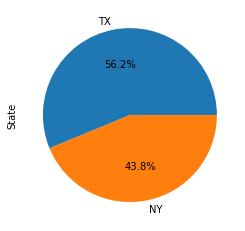

In [27]:
import matplotlib.pyplot as plt
counts=vax_sites_access_df.State.value_counts()
counts.plot(kind='pie',autopct= '%1.1f%%')
plt.show()

In [ ]:
import gmaps 
locations= vax_sites_access_df[['Site Latitude', 'Site Longitude']]
marker_layer=gmaps.marker_layer(locations)
fig.add_layer(marker_layer)
fig

In [29]:
pip install gmaps 

     |████████████████████████████████| 1.1 MB 1.2 MB/s eta 0:00:01


  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=00fefa045280082bc79406145042c8c1f19ececd775c625d43a103d24e2bf73a
  Stored in directory: /Users/Nas/Library/Caches/pip/wheels/66/ab/29/3032938612273665f0fa4d2fab4e3ecfe86480eaaa40aaee91
Successfully built gmaps
Note: you may need to restart the kernel to use updated packages.
